In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
import os
os.chdir('/content/drive/MyDrive/NLP/Covid19 Sentiment Analysis')
!ls

 Corona_NLP_test.csv   Corona_NLP_train.csv  'Covid19 Sentiment Analysis.ipynb'


In [26]:
import pandas as pd
import numpy as np
import os

In [27]:
import sklearn

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import StratifiedKFold, cross_validate, train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix, precision_score, recall_score,  accuracy_score, precision_recall_curve
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold, cross_validate, train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix, precision_score, recall_score,  accuracy_score, precision_recall_curve

In [28]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow.keras.layers as L
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

In [29]:
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import TweetTokenizer
from nltk.tokenize import word_tokenize
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords

In [30]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import seaborn as sns
import matplotlib.pyplot as plt

import scipy

import warnings
warnings.filterwarnings('ignore')

import re
from collections import Counter
from emot.emo_unicode import UNICODE_EMOJI, EMOTICONS_EMO

In [31]:
train = pd.read_csv('Corona_NLP_train.csv', encoding="ISO-8859-1", low_memory=False)

test = pd.read_csv('Corona_NLP_test.csv', encoding="ISO-8859-1", low_memory=False)

In [32]:
df = df = pd.concat([train, test], ignore_index=True, sort=False)

In [33]:
df

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative
...,...,...,...,...,...,...
44950,3794,48746,Israel ??,16-03-2020,Meanwhile In A Supermarket in Israel -- People...,Positive
44951,3795,48747,"Farmington, NM",16-03-2020,Did you panic buy a lot of non-perishable item...,Negative
44952,3796,48748,"Haverford, PA",16-03-2020,Asst Prof of Economics @cconces was on @NBCPhi...,Neutral
44953,3797,48749,NaN,16-03-2020,Gov need to do somethings instead of biar je r...,Extremely Negative


In [34]:
df.describe()

,UserName,ScreenName
count,44955.000000,44955.000000
mean,22478.000000,67430.000000
std,12977.535012,12977.535012
min,1.000000,44953.000000
25%,11239.500000,56191.500000
50%,22478.000000,67430.000000
75%,33716.500000,78668.500000
max,44955.000000,89907.000000


In [35]:
duplicatedRow = df[df.duplicated()]
print(duplicatedRow[:5])

Empty DataFrame
Columns: [UserName, ScreenName, Location, TweetAt, OriginalTweet, Sentiment]
Index: []


In [36]:
df.shape

(44955, 6)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44955 entries, 0 to 44954
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       44955 non-null  int64 
 1   ScreenName     44955 non-null  int64 
 2   Location       35531 non-null  object
 3   TweetAt        44955 non-null  object
 4   OriginalTweet  44955 non-null  object
 5   Sentiment      44955 non-null  object
dtypes: int64(2), object(4)
memory usage: 2.1+ MB


In [38]:
display(train.isnull().sum().sort_values(ascending=False))

,0
Location,8590
UserName,0
ScreenName,0
TweetAt,0
OriginalTweet,0
Sentiment,0


In [39]:
df['Location'].fillna(value='unknown', inplace=True)

In [43]:
encoding = {'Extremely Negative': 'Negative',
            'Extremely Positive': 'Positive'
           }

labels = ['Negative', 'Positive']


df['Sentiment'].replace(encoding, inplace=True)

In [44]:
df["sentiment"] = LabelEncoder().fit_transform(df["Sentiment"])
display(df[["Sentiment", "sentiment"]].head(5))

,Sentiment,sentiment
0,Neutral,1
1,Positive,2
2,Positive,2
3,Positive,2
4,Negative,0


In [45]:
df['CleanTweet'] = df['OriginalTweet'].copy()
display(df.head(5))

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,sentiment,CleanTweet
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,1,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,2,advice Talk to your neighbours family to excha...
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,2,Coronavirus Australia: Woolworths to give elde...
3,3802,48754,unknown,16-03-2020,My food stock is not the only one which is emp...,Positive,2,My food stock is not the only one which is emp...
4,3803,48755,unknown,16-03-2020,"Me, ready to go at supermarket during the #COV...",Negative,0,"Me, ready to go at supermarket during the #COV..."


<Axes: >

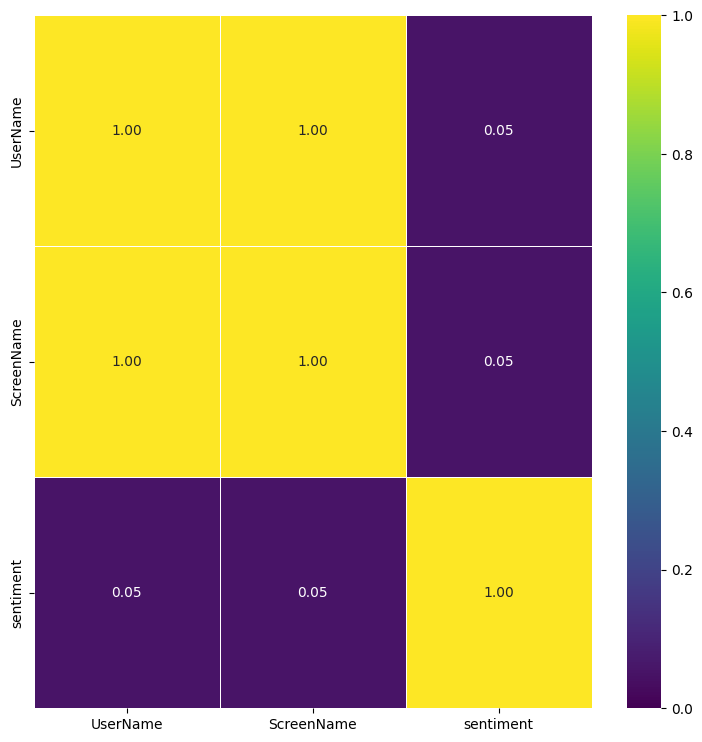

In [47]:
numeric_df = df.select_dtypes(include=['number'])

a = numeric_df.corr()

plt.figure(figsize=(9,9))
sns.heatmap(a, linewidth=.5, annot=True, fmt=".2f", annot_kws={"size":10}, cmap="viridis", vmin = 0, vmax = 1)


In [48]:
def before_lowercase(tweet):
    tweet = re.sub(r" usa ", " America ", tweet)
    tweet = re.sub(r" USA ", " America ", tweet)
    tweet = re.sub(r" u s ", " America ", tweet)
    tweet = re.sub(r" uk ", " England ", tweet)
    tweet = re.sub(r" UK ", " England ", tweet)
    tweet = re.sub(r"USAgov", "USA government", tweet)
    tweet = re.sub(r"the US", "America", tweet)
    tweet = re.sub(r"Coronavirus", " covid ", tweet)
    tweet = re.sub(r"Covid19", " covid ", tweet)
    return str(tweet)

In [49]:
df['CleanTweet'] = df['CleanTweet'].apply(before_lowercase)

display(df['CleanTweet'].head(5))

,CleanTweet
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...
1,advice Talk to your neighbours family to excha...
2,"covid Australia: Woolworths to give elderly,..."
3,My food stock is not the only one which is emp...
4,"Me, ready to go at supermarket during the #COV..."


In [50]:
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'link', text)

from bs4 import BeautifulSoup
def html(text):
    return BeautifulSoup(text, "lxml").text

In [51]:
df['CleanTweet'] = df['CleanTweet'].apply(remove_urls)
df['CleanTweet'] = df['CleanTweet'].apply(html)

In [52]:
df['CleanTweet'] = df['CleanTweet'].str.lower()
display(df['CleanTweet'].head(5))

,CleanTweet
0,@menyrbie @phil_gahan @chrisitv link and link ...
1,advice talk to your neighbours family to excha...
2,"covid australia: woolworths to give elderly, ..."
3,my food stock is not the only one which is emp...
4,"me, ready to go at supermarket during the #cov..."


In [53]:
char_list = ["don", "ain", "ain't", "aren", "arent", "aren't", "cannot", "cant", "can't", "couldn", "couldnt", "couldn't", "didn",
               "didn't", "doesn", "doesn't", "don", "don't", "hadn", "hadn't", "hasn", "hasnt", "hasn't", "haven", "haven't", "mightn", "mightn't",
               "isn", "isn't",  "mustn", "mustn't", "needn", "needn't", "nt", "shouldn", "shouldn't",  "wasn", "wasnt", "wasn't", "don't"]

def before_lowercase(tweet0):
    tweet0 =  re.sub(r"|".join(char_list), "not", tweet0)
    return str(tweet0)

df['CleanTweet'] = df['CleanTweet'].apply(before_lowercase)
display(df['CleanTweet'].head(15))

,CleanTweet
0,@menyrbie @phil_gahan @chrisitv link and link ...
1,advice talk to your neighbours family to excha...
2,"covid australia: woolworths to give elderly, ..."
3,my food stock is not the only one which is emp...
4,"me, ready to go at supermarket during the #cov..."
5,as news of the regionâs first confirmed covid...
6,cashier at grocery store was sharing his insig...
7,was at the supermarket today. not't buy toilet...
8,due to covid-19 our retail store and classroom...
9,"for corona prevenotion,we should stop to buy t..."


In [61]:
def convert_emojis(text):
    for emot in UNICODE_EMOJI:
        text = text.replace(emot, "_".join(UNICODE_EMOJI[emot].replace(",","").replace(":","").split()))
    return text

In [60]:
def convert_emoticons(text):
    for emot in EMOTICONS_EMO:
        text = re.sub(re.escape(emot), "_".join(EMOTICONS_EMO[emot].replace(",", "").split()), text)
    return text

text = "Hello :-) :-)"
convert_emoticons(text)

'Hello Happy_face_smiley Happy_face_smiley'

In [62]:
df['CleanTweet'] = df['CleanTweet'].apply(convert_emojis)
df['CleanTweet'] = df['CleanTweet'].apply(convert_emoticons)
display(df['CleanTweet'].head(15))

,CleanTweet
0,@menyrbie @phil_gahan @chrisitv link and link ...
1,advice talk to your neighbours family to excha...
2,"covid australia: woolworths to give elderly, ..."
3,my food stock is not the only one which is emp...
4,"me, ready to go at supermarket during the #cov..."
5,as news of the regionâs first confirmed covid...
6,cashier at grocery store was sharing his insig...
7,was at the supermarket today. not't buy toilet...
8,due to covid-19 our retail store and classroom...
9,"for corona prevenotion,we should stop to buy t..."


In [63]:
my_stopwords = ["0o", "0s", "3a", "3b", "3d", "6b", "6o", "a", "a1", "a2", "a3", "a4", "ab", "able", "about", "above", "abst", "ac", "accordance", "according", "accordingly",
                     "across", "act", "actually", "ad", "added", "adj", "ae", "af", "after", "afterwards", "ag", "again", "ah", "aj", "al", "all",
                      "also", "although", "always", "am", "among", "amongst", "amoungst",  "an", "and", "announce",
                      "ao", "ap", "apparently", "appear",  "appropriate", "to",
                     "approximately", "ar", "are",  "arise", "around", "as", "a's", "aside",  "associated", "at", "au", "auth", "av",  "aw", "away", "ax", "ay",
                     "az", "b", "b1", "b2", "b3", "ba", "back", "bc", "bd", "be", "became", "because", "become", "becomes", "becoming", "been", "before", "beforehand", "begin", "beginning",
                     "beginnings", "begins", "behind", "being",  "below", "beside", "besides", "between", "beyond", "bi", "bill", "biol", "bj", "bk", "bl", "bn", "both", "bottom",
                     "bp", "br", "brief", "briefly", "bs", "bt", "bu", "but", "bx", "by", "c", "c1", "c2", "c3", "ca", "call", "came",  "cc", "cd", "ce",
                      "cf", "cg", "ch", "ci", "cit", "cj", "cl", "cm", "c'mon", "cn", "co", "com", "come", "comes", "con", "concerning", "consequently",
                     "consider", "considering", "contain", "containing", "contains", "corresponding", "could", "course", "cp", "cq", "cr", "cry", "cs", "c's", "ct", "cu", "currently",
                     "cv", "cx", "cy", "cz", "d", "d2", "da", "date", "dc", "dd", "de", "definitely", "describe", "described", "despite", "detail", "df", "di", "did",  "different", "dj",
                     "dk", "dl", "do", "does", "doing", "downwards", "dp", "dr", "ds", "dt", "du", "due", "during", "dx", "dy", "e", "e2", "e3", "ea", "each", "ec", "ed",
                     "edu", "ee", "ef", "effect", "eg", "ei", "eight", "eighty", "either", "ej", "el", "eleven", "else", "elsewhere", "em", "en", "end", "ending", "entirely", "eo", "ep", "eq",
                     "er", "es", "especially", "est", "et", "et-al", "etc", "eu", "ev", "every", "everybody", "everyone", "everything", "everywhere", "ex", "exactly", "example", "ey", "f", "f2",
                     "fa", "far", "fc", "few", "ff", "fi", "fifteen", "fifth", "fify", "fill", "find", "fire", "first", "five", "fix", "fj", "fl", "fn", "fo", "followed", "following", "follows",
                     "for", "former", "formerly", "forth", "forty", "found", "four", "fr", "from", "front", "fs", "ft", "fu", "full", "further", "furthermore", "fy", "g", "ga", "gave", "ge",
                     "get", "gets", "getting", "gi", "give", "given", "gives", "giving", "gj", "gl", "go", "goes", "going", "gone", "got", "gotten", "gr", "greetings", "gs", "gy", "h", "h2",
                     "h3", "had", "happens", "hardly", "has",  "have",  "having", "he", "hed", "he'd", "he'll", "hello", "hence", "her", "here", "hereafter", "hereby", "herein", "heres",
                     "here's", "hereupon", "hers", "herself", "hes", "he's", "hh", "hi", "hid", "him", "himself", "his", "hither", "hj", "ho",  "hopefully", "how", "howbeit", "however",
                     "how's", "hr", "hs", "http", "hu", "hundred", "hy", "i", "i2", "i3", "i4", "i6", "i7", "i8", "ia", "ib", "ibid", "ic", "id", "i'd", "ie", "if", "ig",  "ih", "ii", "ij",
                     "il", "i'll", "im", "i'm", "in", "inasmuch", "inc", "index", "indicate", "indicated", "indicates", "inner", "insofar", "interest", "into", "invention",
                     "inward", "io", "ip", "iq", "ir", "is",  "it", "itd", "it'd", "it'll", "its", "it's", "itself", "iv", "i've", "ix", "iy", "iz", "j", "jj", "jr", "js", "jt", "ju",
                     "k", "ke", "keep", "keeps", "kept", "kg", "kj", "km", "know", "known", "knows", "ko", "l", "l2", "la", "largely",  "lately", "later", "latter", "latterly", "lb", "lc",
                     "le", "les", "lest", "let", "lets", "let's", "lf", "line", "little", "lj", "ll", "ll", "ln", "lo", "look", "looking", "looks", "los", "lr", "ls", "lt", "ltd",
                     "m", "m2", "ma", "made", "mainly", "make", "makes", "me", "mean", "means", "meantime", "meanwhile", "merely", "mg", "mill", "million", "mine",
                     "ml", "mn", "mo", "more", "moreover", "move", "mr", "mrs", "ms", "mt", "mu", "mug",  "my", "myself", "n", "n2", "na", "name", "namely", "nay",
                     "nc", "nd", "ne", "near", "nearly","new", "next", "ng", "ni", "nine", "ninety", "nj", "nl", "nn", "nos", "noted",  "novel", "now", "nr", "ns",  "ny", "o", "oa", "ob",
                     "obtain", "obtained", "obviously", "oc", "od", "of", "off", "often", "og", "oh", "oi", "oj", "ol", "old", "om", "omitted", "on", "once", "one", "ones",  "onto",
                     "oo", "op", "oq", "or", "ord", "os", "ot", "other", "others",  "ou", "ought", "our", "ours", "ourselves",  "overall", "ow", "owing", "own", "ox", "oz", "p", "p1", "p2",
                     "p3", "page", "pagecount", "pages", "par", "part", "particular", "particularly", "pas", "past", "pc", "pd", "pe", "per", "pf", "ph", "pi", "pj", "pk", "pl", "placed",
                      "plus", "pm", "pn", "po", "pp", "pq", "pr", "predominantly", "present", "presumably", "previously",  "promptly", "ps", "pt", "pu", "put", "py", "q", "qj", "qu", "que",
                      "qv", "r", "r2", "ra", "ran", "rather", "rc", "rd", "re", "readily",  "ref", "refs", "regarding",  "related", "relatively", "research-articl", "respectively",
                      "rf", "rh", "ri", "right", "rj", "rl", "rm", "rn", "ro", "rq", "rr", "rs", "rt", "ru", "run", "rv", "ry", "s", "s2", "sa", "said", "same", "saw", "say", "saying", "says",
                     "sc", "sd", "se", "sec", "second", "secondly", "section", "see", "seeing", "seem", "seemed", "seeming", "seems", "seen", "self", "selves", "sensible", "sent",
                     "seven", "several", "sf", "shall", "shan", "shan't", "she", "shed", "she'd", "she'll", "shes", "she's", "should",  "should've",  "si", "side", "significant",
                     "significantly", "similar", "similarly", "since", "sincere", "six", "sixty", "sj", "sl", "slightly", "sm", "sn", "so", "some", "somebody", "somehow", "someone",
                     "somethan", "something", "sometime", "sometimes", "somewhat", "somewhere", "soon", "sp", "specifically", "specified", "specify", "specifying", "sq", "sr", "ss", "st",
                      "sub", "substantially", "sup", "sy", "system", "sz", "t", "t1", "t2", "t3", "take", "taken", "taking", "tb", "tc", "td", "te", "tell", "ten", "tends", "tf", "th",  "that",
                     "that'll", "thats", "that's", "that've", "the", "their", "theirs", "them", "themselves", "then", "thence", "there", "thereafter", "thereby", "thered", "therefore", "therein",
                     "there'll", "thereof", "therere", "theres", "there's", "thereto", "thereupon", "there've", "these", "they", "theyd", "they'd", "they'll", "theyre", "they're", "they've",
                     "thickv", "thin", "think", "third", "this", "thorough", "thoroughly", "those", "thou", "though", "thoughh", "thousand", "three", "throug", "through", "throughout", "thru",
                     "thus", "ti", "til", "tip", "tj", "tl", "tm", "tn", "to",  "too", "took", "top", "toward", "towards", "tp", "tq", "tr",  "ts", "t's", "tt", "tv", "twelve", "twenty",
                     "twice", "two", "tx", "u", "u201d", "ue", "ui", "uj", "uk", "um", "un", "under", "unto", "uo", "up", "upon", "ups", "ur", "us", "use", "used",  "uses", "using","ut",
                     "v", "va", "value", "various", "vd", "ve", "ve",  "via", "viz", "vj", "vo", "vol", "vols", "volumtype", "vq", "vs", "vt", "vu", "w", "wa", "want", "wants", "was",  "way", "we",
                     "wed", "we'd",  "went", "were", "we're",  "we've", "what", "whatever", "what'll", "whats", "what's", "when", "whence", "whenever", "when's", "where", "whereafter",
                     "whereas", "whereby", "wherein", "wheres", "where's", "whereupon", "wherever", "whether", "which", "while", "whim", "whither", "who", "whod", "whoever", "whole", "who'll",
                     "whom", "whomever", "whos", "who's", "whose", "why", "why's", "wi", "widely", "will", "willing", "with", "within",  "wo",  "words", "world", "would",  "www", "x", "x1", "x2",
                     "x3", "xf", "xi", "xj", "xk", "xl", "xn", "xo", "xs", "xt", "xv", "xx", "y", "y2", "yes", "yet", "yj", "yl", "you", "youd", "you'd", "you'll", "your", "youre", "you're", "yours",
                     "yourself", "yourselves", "you've", "yr", "ys", "yt", "z", "zero", "zi", "zz",',', '.', '"', ':', ')', '(', '!', '?', '|', ';', "'", '$', '&','/', '[', ']', '>', '%', '=', '#', '*', '+',
                '\\', '•',  '~', '@', '£', '·', '_', '{', '}', '©', '^', '®', '`',  '<', '→', '°', '€', '™', '›', '♥', '←', '×', '§', '″', '′', 'Â', '█', '½', 'à', '…', '“', '★', '”', '–', '●', 'â', '►', '−',
                '¢', '²', '¬', '░', '¶', '↑', '±', '¿', '▾',
                '═', '¦', '║', '―', '¥', '▓', '—', '‹', '─', '▒', '：', '¼', '⊕', '▼',
                '▪', '†', '■', '’', '▀', '¨', '▄', '♫', '☆', 'é', '¯', '♦', '¤', '▲',
                'è', '¸', '¾', 'Ã', '⋅', '‘', '∞', '∙', '）', '↓', '、', '│', '（', '»',
                '，', '♪', '╩', '╚', '³', '・', '╦', '╣', '╔', '╗', '▬', '❤', 'ï', 'Ø',
                '¹', '≤', '‡', '√', '«', '»', '´', 'º', '¾', '¡', '§', '£', '₤']
print(len(my_stopwords))

1092


In [64]:
def remove_swords(text,s_list):
    a=[]
    for s in text.split():
        if s not in my_stopwords:
            a.append(s)
    return a

In [65]:
b=[]
for t in df['CleanTweet']:

    b.append(remove_swords(t ,my_stopwords))

In [66]:
df['CleanTweet2'] = b
df['CleanTweet2'].head()

,CleanTweet2
0,"[@menyrbie, @phil_gahan, @chrisitv, link, link..."
1,"[advice, talk, neighbours, family, exchange, p..."
2,"[covid, australia:, woolworths, elderly,, disa..."
3,"[food, stock, not, only, empty..., please,, no..."
4,"[me,, ready, supermarket, #covid19, outbreak.,..."


In [67]:
def combine_text(input):
    combined = ' '.join(input)
    return combined
df['CleanTweet'] = df['CleanTweet2'].apply(combine_text)
df['CleanTweet']

,CleanTweet
0,@menyrbie @phil_gahan @chrisitv link link link
1,advice talk neighbours family exchange phone n...
2,"covid australia: woolworths elderly, disabled ..."
3,"food stock not only empty... please, not't pan..."
4,"me, ready supermarket #covid19 outbreak. not p..."
...,...
44950,supermarket israel -- people dance sing togeth...
44951,panic buy lot non-perishable items? echo needs...
44952,asst prof economics @cconces @nbcphiladelphia ...
44953,gov need somethings instead biar je rakyat ass...


In [68]:
def clean(tweet):

    tweet = re.sub(r"\x89Û_", "", tweet)
    tweet = re.sub(r"\x89ÛÒ", "", tweet)
    tweet = re.sub(r"\x89ÛÓ", "", tweet)
    tweet = re.sub(r"\x89ÛÏWhen", "When", tweet)
    tweet = re.sub(r"\x89ÛÏ", "", tweet)
    tweet = re.sub(r"China\x89Ûªs", "China's", tweet)
    tweet = re.sub(r"let\x89Ûªs", "let's", tweet)
    tweet = re.sub(r"\x89Û÷", "", tweet)
    tweet = re.sub(r"\x89Ûª", "", tweet)
    tweet = re.sub(r"\x89Û\x9d", "", tweet)
    tweet = re.sub(r"å_", "", tweet)
    tweet = re.sub(r"\x89Û¢", "", tweet)
    tweet = re.sub(r"\x89Û¢åÊ", "", tweet)
    tweet = re.sub(r"fromåÊwounds", "from wounds", tweet)
    tweet = re.sub(r"åÊ", "", tweet)
    tweet = re.sub(r"åÈ", "", tweet)

    tweet = re.sub(r"Ì©", "e", tweet)
    tweet = re.sub(r"å¨", "", tweet)

    tweet = re.sub(r"åÇ", "", tweet)

    tweet = re.sub(r"åÀ", "", tweet)
    tweet = re.sub(r'\b[\w\-.]+?@\w+?\.\w{2,4}\b', 'mentioned', tweet)
    tweet = re.sub(r'(http[s]?\S+)|(\w+\.[A-Za-z]{2,4}\S*)', 'referance',
                     tweet)
    tweet = re.sub(r'£|\$', 'money', tweet)
    tweet = re.sub(r'\b(\+\d{1,2}\s)?\d?[\-(.]?\d{3}\)?[\s.-]?\d{3}[\s.-]?\d{4}\b',
                   ' ', tweet)
    tweet = re.sub(r'\d+(\.\d+)?', ' ', tweet)
    tweet = re.sub(r'[^\w\d\s]', ' ', tweet)
    tweet = re.sub(r'\s+', ' ', tweet)
    tweet = re.sub(r'^\s+|\s+?$', '', tweet.lower())



    tweet = re.sub(r"he'll", "he will", tweet)
    tweet = re.sub(r"Y'all", "You all", tweet)
    tweet = re.sub(r"Weren't", "Were not", tweet)
    tweet = re.sub(r"Didn't", "Did not", tweet)
    tweet = re.sub(r"they'll", "they will", tweet)
    tweet = re.sub(r"luv", "love", tweet)
    tweet = re.sub(r"they'd", "they would", tweet)
    tweet = re.sub(r"DON'T", "DO NOT", tweet)
    tweet = re.sub(r"That\x89Ûªs", "That is", tweet)
    tweet = re.sub(r"You\x89Ûªre", "You are", tweet)
    tweet = re.sub(r"where's", "where is", tweet)
    tweet = re.sub(r"Don\x89Ûªt", "Do not", tweet)
    tweet = re.sub(r"we'd", "we would", tweet)
    tweet = re.sub(r"i'll", "I will", tweet)
    tweet = re.sub(r"weren't", "were not", tweet)
    tweet = re.sub(r"They're", "They are", tweet)
    tweet = re.sub(r"Can\x89Ûªt", "Cannot", tweet)
    tweet = re.sub(r"you\x89Ûªll", "you will", tweet)
    tweet = re.sub(r"I\x89Ûªd", "I would", tweet)


    tweet = re.sub(r"&gt;", ">", tweet)
    tweet = re.sub(r"&lt;", "<", tweet)
    tweet = re.sub(r"&amp;", "&", tweet)

    tweet = re.sub(r"w/e", "whatever", tweet)
    tweet = re.sub(r"w/", "with", tweet)

    tweet = re.sub(r"Ph0tos", "Photos", tweet)
    tweet = re.sub(r"amirite", "am I right", tweet)
    tweet = re.sub(r"exp0sed", "exposed", tweet)


    tweet = re.sub(r"Trfc", "Traffic", tweet)
    tweet = re.sub(r"lmao", "laughing my ass off", tweet)

    tweet = re.sub(r"e-mail", "email", tweet)
    tweet = re.sub(r"\s{2,}", " ", tweet)
    tweet = re.sub(r"quikly", "quickly", tweet)



    tweet = re.sub(r" iPhone ", " phone ", tweet)
    tweet = re.sub(r"\0rs ", " rs ", tweet)

    tweet = re.sub(r"ios", "operating system", tweet)

    tweet = re.sub(r"programing", "programming", tweet)
    tweet = re.sub(r"bestfriend", "best friend", tweet)


    tweet = re.sub(r" J K ", " JK ", tweet)
    tweet = re.sub(r"coronavirus", " covid19", tweet)
    tweet = re.sub(r"covid", " covid19", tweet)
    tweet = re.sub(r"corrona", " covid19 ", tweet)
    tweet = re.sub(r"covid1919", " covid19 ", tweet)
    tweet = re.sub(r"_", "  ", tweet)

    tweet = re.sub(r"https?:\/\/t.co\/[A-Za-z0-9]+", "", tweet)

    punctuations = '@#!?+&*[]-%.:/();$=><|{}^' + "'`"
    for p in punctuations:
        tweet = tweet.replace(p, f' {p} ')

    tweet = tweet.replace('...', ' ... ')
    if '...' not in tweet:
        tweet = tweet.replace('..', ' ... ')




    return str(tweet)

In [69]:
df['CleanTweet'] = df['CleanTweet'].apply(clean)
display(df['CleanTweet'].head(15))

,CleanTweet
0,menyrbie phil gahan chrisitv link link link
1,advice talk neighbours family exchange phone n...
2,covid19 australia woolworths elderly disabled...
3,food stock not only empty please not t panic e...
4,me ready supermarket covid19 outbreak not par...
5,news regionâ s confirmed covid19 case out sul...
6,cashier grocery store sharing insights covid1...
7,supermarket today not t buy toilet paper rebel...
8,covid19 retail store classroom atlanota not o...
9,corona prevenotion we stop buy things cash onl...


In [71]:
from spellchecker import SpellChecker

spell = SpellChecker()
def correct_spellings(text):
    corrected_text = []
    misspelled_words = spell.unknown(text.split())
    for word in text.split():
        if word in misspelled_words:
            corrected_text.append(spell.correction(word))
        elif word not in misspelled_words:
            corrected_text.append(word)
        else:
            corrected_text.append(word)
    return " ".join(corrected_text)

text = "raed"
correct_spellings(text)

'read'

In [72]:
display(df['CleanTweet'].head(5))

,CleanTweet
0,menyrbie phil gahan chrisitv link link link
1,advice talk neighbours family exchange phone n...
2,covid19 australia woolworths elderly disabled...
3,food stock not only empty please not t panic e...
4,me ready supermarket covid19 outbreak not par...


In [73]:
import string
regular_punct = list(string.punctuation)
def remove_punctuation(text,punct_list):
    for punc in punct_list:
        if punc in text:
            text = text.replace(punc, ' ')
    return text.strip()
text =" advice talk to your neighbours family to excha.."
remove_punctuation(text ,regular_punct)

'advice talk to your neighbours family to excha'

In [74]:
df.groupby('Sentiment').describe(include=['O']).T

Sentiment                                                      Negative  \
Location      count                                               17031   
              unique                                               6079   
              top                                               unknown   
              freq                                                 3759   
TweetAt       count                                               17031   
              unique                                                 42   
              top                                            20-03-2020   
              freq                                                 1463   
OriginalTweet count                                               17031   
              unique                                              17031   
              top     Me, ready to go at supermarket during the #COV...   
              freq                                                    1   
CleanTweet    count                                               17031   
              unique                                              16986   
              top     helping healthcare stakeholders understand hum...   
              freq                                                    3   
CleanTweet2   count                                               17031   
              unique                                              17011   
              top     [hands, deck, grocery, store, executives, tast...   
              freq                                                    3   

Sentiment                                                       Neutral  \
Location      count                                                8332   
              unique                                               3324   
              top                                               unknown   
              freq                                                 1663   
TweetAt       count                                                8332   
              unique                                                 40   
              top                                            20-03-2020   
              freq                                                  597   
OriginalTweet count                                                8332   
              unique                                               8332   
              top     @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...   
              freq                                                    1   
CleanTweet    count                                                8332   
              unique                                               8265   
              top                                                  link   
              freq                                                    8   
CleanTweet2   count                                                8332   
              unique                                               8311   
              top                                                    []   
              freq                                                    3   

Sentiment                                                      Positive  
Location      count                                               19592  
              unique                                               6850  
              top                                               unknown  
              freq                                                 4002  
TweetAt       count                                               19592  
              unique                                                 44  
              top                                            25-03-2020  
              freq                                                 1431  
OriginalTweet count                                               19592  
              unique                                              19592  
              top     advice Talk 

In [75]:
temp = df.groupby('Sentiment').count()['CleanTweet'].reset_index().sort_values(by='CleanTweet',ascending=False)
temp.style.background_gradient(cmap='Purples')

,Sentiment,CleanTweet
2,Positive,19592
0,Negative,17031
1,Neutral,8332


<Axes: xlabel='Sentiment', ylabel='count'>

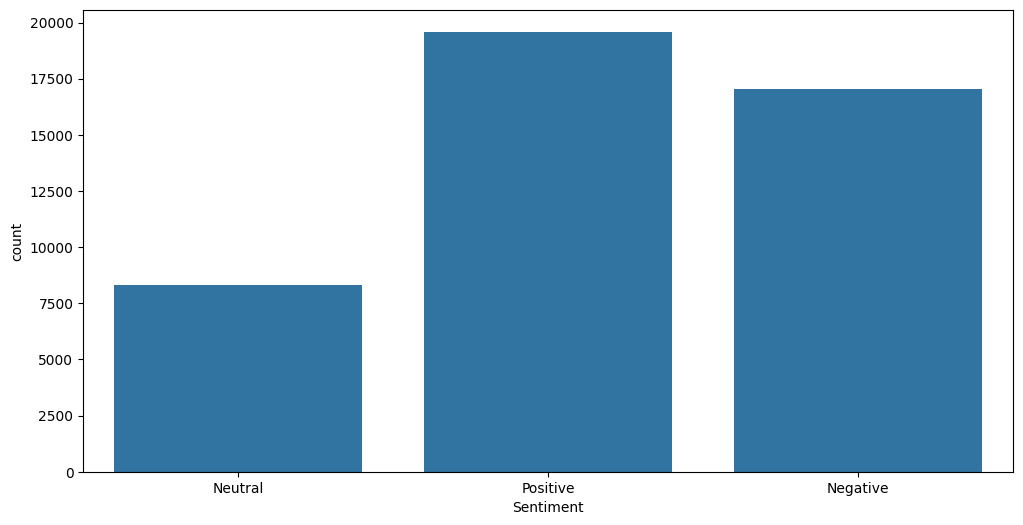

In [76]:
plt.figure(figsize=(12,6))
sns.countplot(x='Sentiment',data=df)

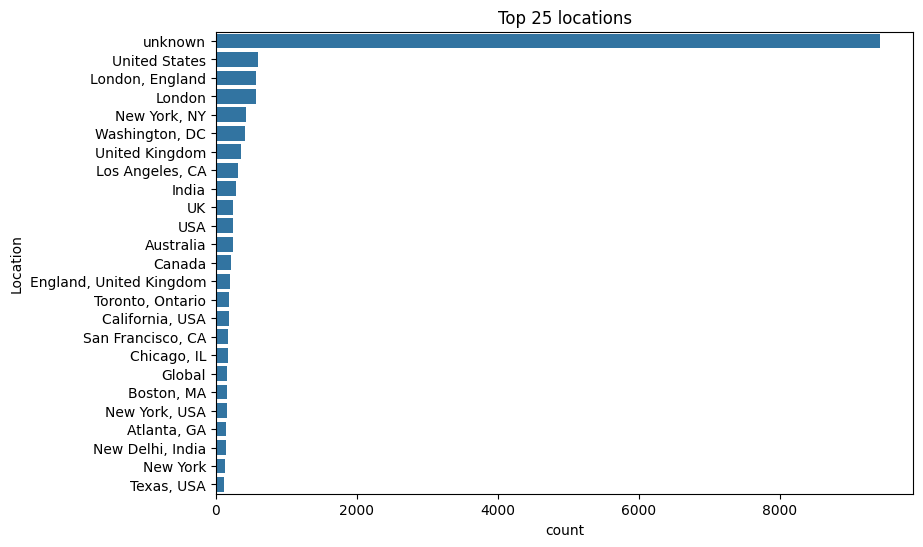

In [77]:
plt.figure(figsize=(9,6))
sns.countplot(y=df.Location, order = df.Location.value_counts().iloc[:25].index)
plt.title('Top 25 locations')
plt.show()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,sentiment,CleanTweet,CleanTweet2
8455,12254,57206,Everywhere,19-03-2020,all grocery store workers should get free test...,Positive,2,grocery store workers free testing kits cov...,"[grocery, store, workers, free, testing, kits...."
15759,19558,64510,"NYC, New York",22-03-2020,Are cheap goods worth the price of BRIAN R JOS...,Positive,2,cheap goods worth price brian joseph covid19 ...,"[cheap, goods, worth, price, brian, joseph, co..."



Sample Tweet Positive :
-------------------------------
advice talk neighbours family exchange phone numbers create conotact list phone numbers neighbours schools employer chemist gp set online shopping accounots poss adequate supplies regular meds not over order

Sample Tweet Negative :
--------------------------------------
me ready supermarket  covid19 outbreak not paranoid food stock litteraly empty    covid19  serious thing please not t panic causes shortage  covid19 france restezchezvous stayathome confinemenot link

Sample Tweet Neutral:
--------------------------------------
menyrbie phil  gahan chrisitv link link link

Tweets distribution for Disaster Tweets (1)  and Non-Disaster Tweets (0)
------------------------------------------------------------------------


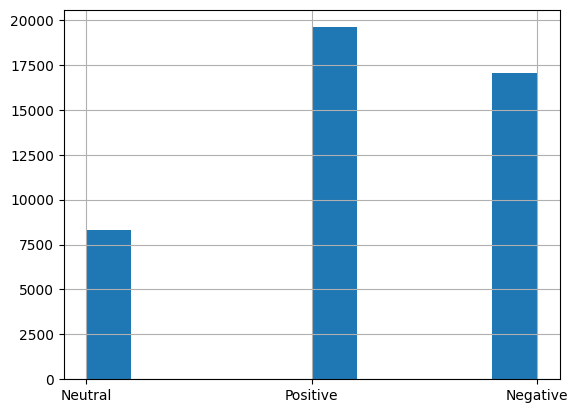

In [78]:
display(df.sample(2))

print ( '\nSample Tweet Positive :\n-------------------------------')
print ( df[df['Sentiment']=='Positive'].CleanTweet.values[0] )

print ( '\nSample Tweet Negative :\n--------------------------------------')
print ( df[df['Sentiment']=='Negative'].CleanTweet.values[0] )

print ( '\nSample Tweet Neutral:\n--------------------------------------')
print ( df[df['Sentiment']=='Neutral'].CleanTweet.values[0] )

print ( '\nTweets distribution for Disaster Tweets (1)  and Non-Disaster Tweets (0)\n------------------------------------------------------------------------')
df['Sentiment'].hist() ;

In [79]:
from collections import Counter
cnt = Counter()
for text in df["CleanTweet"].values:
    for word in text.split():
        cnt[word] += 1

cnt.most_common(10)

[('covid19', 49150),
 ('link', 26000),
 ('not', 8642),
 ('food', 8518),
 ('prices', 8370),
 ('store', 7944),
 ('supermarket', 7595),
 ('grocery', 7106),
 ('people', 6355),
 ('s', 5231)]

In [80]:
def get_n_words(corpus, direction, n):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    if direction == "top":
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    else:
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=False)
    return words_freq[:n]

In [81]:
from sklearn.feature_extraction.text import CountVectorizer
common_words = get_n_words(df['CleanTweet'], "top", 15)
rare_words = get_n_words(df['CleanTweet'], "bottom", 15)

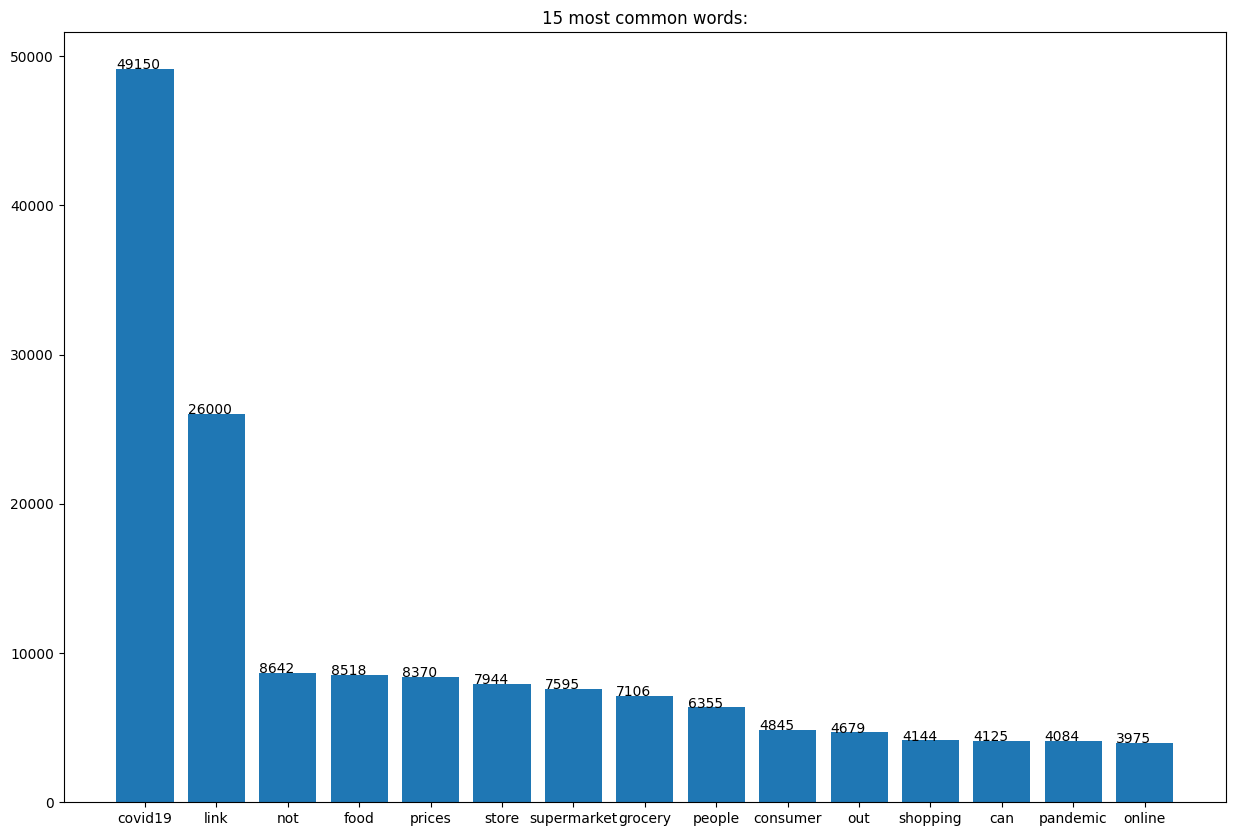

In [82]:
common_words = dict(common_words)
names = list(common_words.keys())
values = list(common_words.values())
plt.subplots(figsize = (15,10))
bars = plt.bar(range(len(common_words)),values,tick_label=names)
plt.title('15 most common words:')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .01, yval)
plt.show()

In [83]:
Positive = df[df.Sentiment =='Positive']
Negative = df[df.Sentiment=='Negative']
Neutral = df[df.Sentiment=='Neutral']
positive_text = " ".join(Positive.CleanTweet.to_numpy().tolist())
negative_text = " ".join(Negative.CleanTweet.to_numpy().tolist())
neutral_text = " ".join(Neutral.CleanTweet.to_numpy().tolist())

In [86]:
print(df.dtypes)

UserName          int64
ScreenName        int64
Location         object
TweetAt          object
OriginalTweet    object
Sentiment        object
sentiment         int64
CleanTweet       object
CleanTweet2      object
text_length       int64
dtype: object


In [87]:
df['text_length'] = df['CleanTweet'].apply(len)

labels = df.groupby('Sentiment')[df.select_dtypes(include=['int64', 'float64']).columns].mean()

labels

,UserName,ScreenName,sentiment,text_length
Sentiment,,,,
Negative,21496.961952,66448.961952,0.0,140.464565
Neutral,23285.213994,68237.213994,1.0,111.811450
Positive,22987.511637,67939.511637,2.0,142.788996


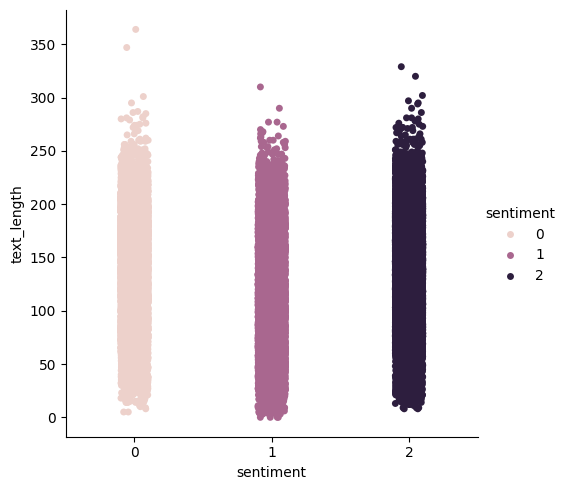

In [88]:
sns.catplot(x="sentiment", y="text_length",hue="sentiment", data=df);

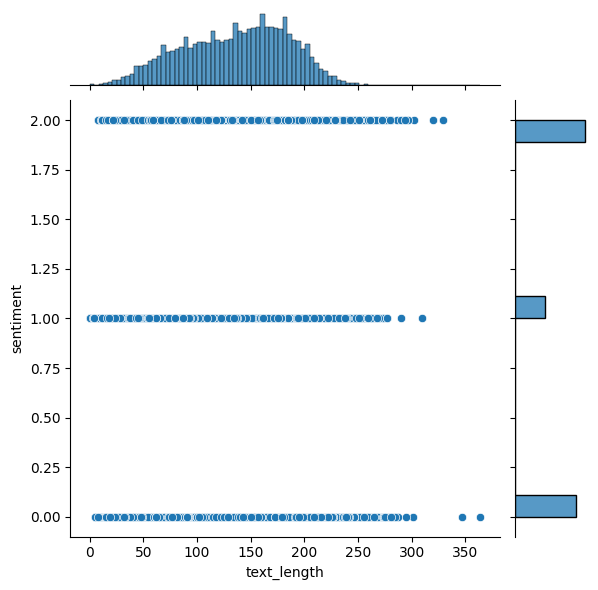

In [89]:
sns.jointplot(x=df['text_length'], y=df['sentiment']);

In [91]:
import nltk
nltk.download('punkt_tab')

df['CleanTweet'] = df['CleanTweet'].apply(word_tokenize)
display(df['CleanTweet'].head(5))

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


,CleanTweet
0,"[menyrbie, phil, gahan, chrisitv, link, link, ..."
1,"[advice, talk, neighbours, family, exchange, p..."
2,"[covid19, australia, woolworths, elderly, disa..."
3,"[food, stock, not, only, empty, please, not, t..."
4,"[me, ready, supermarket, covid19, outbreak, no..."


In [93]:
import nltk
nltk.download('wordnet')

lem = WordNetLemmatizer()
def lemma_wordnet(input):
    return [lem.lemmatize(w) for w in input]
df['CleanTweet'] = df['CleanTweet'].apply(lemma_wordnet)

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [94]:
display(df['CleanTweet'].head(5))

,CleanTweet
0,"[menyrbie, phil, gahan, chrisitv, link, link, ..."
1,"[advice, talk, neighbour, family, exchange, ph..."
2,"[covid19, australia, woolworth, elderly, disab..."
3,"[food, stock, not, only, empty, please, not, t..."
4,"[me, ready, supermarket, covid19, outbreak, no..."


In [95]:
def combine_text(input):
    combined = ' '.join(input)
    return combined
df['CleanTweet'] = df['CleanTweet'].apply(combine_text)
df['CleanTweet']

,CleanTweet
0,menyrbie phil gahan chrisitv link link link
1,advice talk neighbour family exchange phone nu...
2,covid19 australia woolworth elderly disabled d...
3,food stock not only empty please not t panic e...
4,me ready supermarket covid19 outbreak not para...
...,...
44950,supermarket israel people dance sing together ...
44951,panic buy lot non perishable item echo need fo...
44952,asst prof economics cconces nbcphiladelphia ta...
44953,gov need somethings instead biar je rakyat ass...


In [96]:
train, test = train_test_split(df)

In [97]:
cv = CountVectorizer()
cv.fit(train)
X_train_bow = cv.fit_transform(train['CleanTweet'])
X_test_bow = train['sentiment']
Y_train_bow = cv.transform(test['CleanTweet'])
Y_test = test['sentiment']


vectorizer = TfidfVectorizer(norm = None)
vectorizer.fit(train)
X_train_tfidf = vectorizer.fit_transform(train['CleanTweet'])
X_test_tfidf = train['sentiment']
Y_train_tdidf =vectorizer.transform(test['CleanTweet'])


hv = HashingVectorizer()
hv.fit(train)
X_train_hash = hv.fit_transform(train['CleanTweet'])
X_test_hash = train['sentiment']
Y_train_hash = hv.transform(test['CleanTweet'])

In [99]:
display("Bow-TF:IDF :", X_train_bow.shape)
df_tfidf = pd.DataFrame(X_train_bow.toarray(), columns=cv.get_feature_names_out())
display(df_tfidf.head())

'Bow-TF:IDF :'

(33716, 44023)

,aa,aaa,aaaaakubosan,aaachatterjee,aaanews,aaannnddd,aaanortheast,aacopd,aacounoty,aacounotygovt,...,âmoneycairandale,âmoneycashtag,âmoneyâmoney,âregisteredâcopyright,â²,â¹,ãcopyrightconomie,ãcopyrightpidãcopyrightmie,ãmoneyo,ã¼berweist
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [100]:
from sklearn import linear_model
alpha = [80.0, 90.0, 100.0, 110.0, 120.0]
for a in alpha:
    ridge = linear_model.RidgeClassifier(a)
    scores = sklearn.model_selection.cross_val_score(ridge, X_train_bow, X_test_bow, cv=5)#scoring='f1' kaldirdim multiclass hatasina karsilik
    print("alpha: ",a)
    print(scores)
    print(np.mean(scores))
    print('\n')

alpha:  80.0
[0.77787663 0.77280142 0.77814029 0.77309803 0.77339463]
0.7750622014939618


alpha:  90.0
[0.77416963 0.76924218 0.77487765 0.76879727 0.76835237]
0.7710878193791408


alpha:  100.0
[0.76912811 0.76627614 0.77280142 0.76597953 0.7631618 ]
0.7674694015093021


alpha:  110.0
[0.76675563 0.76286519 0.76850067 0.76227199 0.75856444]
0.7637915836976231


alpha:  120.0
[0.7633452  0.76004746 0.76553463 0.75856444 0.75515349]
0.7605290421119463




In [102]:
from sklearn.naive_bayes import MultinomialNB
alpha = [1e-10, 1e-5, 0.1, 1.0, 2.0, 5.0]
for a in alpha:
    mnb = MultinomialNB(alpha=a)
    scores = sklearn.model_selection.cross_val_score(mnb, X_train_bow, X_test_bow, cv=5)
    print('alpha: ', a)
    print(scores)
    print(np.mean(scores))
    print('\n')

alpha:  1e-10
[0.62959668 0.62464778 0.62687231 0.62138514 0.61990212]
0.6244808068610846


alpha:  1e-05
[0.63137604 0.6259825  0.62998665 0.62405458 0.62286816]
0.6268535851686798


alpha:  0.1
[0.67363582 0.67032478 0.66958327 0.6643927  0.66246478]
0.668080271813008


alpha:  1.0
[0.67927046 0.67773988 0.68396856 0.67714667 0.67314252]
0.6782536179604736


alpha:  2.0
[0.66147687 0.66913837 0.66290968 0.66276138 0.66187157]
0.6636315741697071


alpha:  5.0
[0.64190391 0.64778289 0.6415542  0.64496515 0.64318553]
0.643878335936094




In [103]:
alpha = [175.0, 200.0, 225.0, 250.0, 300.0]
for a in alpha:
    mnb = MultinomialNB(alpha=a)
    scores = sklearn.model_selection.cross_val_score(mnb, X_train_tfidf, X_test_tfidf, cv=5)
    print('alpha: ', a)
    print(scores)
    print(np.mean(scores))
    print('\n')

alpha:  175.0
[0.63256228 0.63280439 0.62672401 0.63206288 0.63295269]
0.6314212498212196


alpha:  200.0
[0.62959668 0.62954175 0.62524099 0.62939345 0.62909684]
0.6285739404811351


alpha:  225.0
[0.62781732 0.62894854 0.62375797 0.62716892 0.62702061]
0.6269426718873172


alpha:  250.0
[0.62411032 0.62553759 0.62227495 0.6262791  0.62494439]
0.6246292715313574


alpha:  300.0
[0.6198102  0.62168174 0.62094023 0.62375797 0.62331307]
0.6219006433278464




In [104]:
alpha = [1.1, 1.2, 1.3, 1.4, 1.5, 2.0]
for a in alpha:
    ridge = linear_model.RidgeClassifier(a)
    scores = sklearn.model_selection.cross_val_score(ridge, X_train_hash, X_test_hash, cv=5)
    print("alpha: ",a)
    print(scores)
    print(np.mean(scores))
    print('\n')

alpha:  1.1
[0.80160142 0.79311879 0.8012754  0.79430521 0.79104256]
0.7962686756214301


alpha:  1.2
[0.80130486 0.79163577 0.80068219 0.79475011 0.79133917]
0.7959424201434501


alpha:  1.3
[0.80204626 0.79133917 0.80038559 0.793712   0.79030105]
0.7955568131020809


alpha:  1.4
[0.80130486 0.79044935 0.80083049 0.79267388 0.79104256]
0.7952602312067749


alpha:  1.5
[0.80130486 0.79119086 0.79919917 0.79282219 0.78955954]
0.7948153253785086


alpha:  2.0
[0.79744958 0.78866973 0.79074596 0.7860003  0.78496218]
0.7895655509540318




In [105]:
alpha = [500.0, 1500.0, 2500.0, 3000.0]
for a in alpha:
    ridge = linear_model.RidgeClassifier(a)
    scores = sklearn.model_selection.cross_val_score(ridge, X_train_tfidf, X_test_tfidf, cv=5)
    print("alpha: ",a)
    print(scores)
    print(np.mean(scores))
    print('\n')

alpha:  500.0
[0.78543891 0.7787335  0.78822483 0.77991992 0.77606407]
0.7816762438407634


alpha:  1500.0
[0.79670819 0.79000445 0.79475011 0.79282219 0.78733501]
0.7923239890794883


alpha:  2500.0
[0.78870107 0.7864452  0.78911464 0.78392407 0.78273765]
0.7861845261436271


alpha:  3000.0
[0.78662515 0.78214445 0.78466558 0.77991992 0.77814029]
0.7822990768160083




In [106]:
from sklearn.metrics import accuracy_score
ridge = linear_model.RidgeClassifier(1.4)
ridge.fit(X_train_hash, X_test_hash)
test['sentiment_pred'] = ridge.predict(Y_train_hash)
y_true = test['sentiment']
y_pred = test['sentiment_pred']
accuracy_score(y_true, y_pred)

0.7955334104457692

In [107]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_true, y_pred, target_names = ['Negative Tweets','Neutral Tweets', 'Positive Tweets']))

                 precision    recall  f1-score   support

Negative Tweets       0.81      0.82      0.82      4283
 Neutral Tweets       0.75      0.58      0.65      2079
Positive Tweets       0.80      0.86      0.83      4877

       accuracy                           0.80     11239
      macro avg       0.78      0.76      0.77     11239
   weighted avg       0.79      0.80      0.79     11239



Text(83.22222222222221, 0.5, 'Actual')

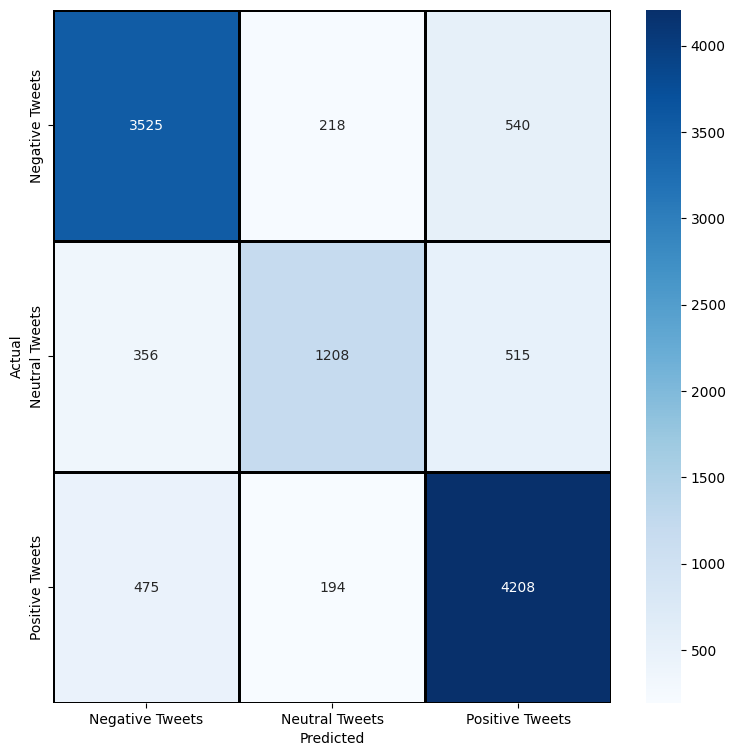

In [108]:
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize = (9,9))
sns.heatmap(cm,cmap= "Blues",
            linecolor = 'black',
            linewidth = 1,
            annot = True,
            fmt='',
            xticklabels = ['Negative Tweets','Neutral Tweets', 'Positive Tweets'],
            yticklabels = ['Negative Tweets','Neutral Tweets', 'Positive Tweets'])
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [109]:
dtclassifier=DecisionTreeClassifier(criterion="entropy", max_depth=None)
dtclassifier.fit(X_train_bow,train['sentiment'])
preddt = dtclassifier.predict(Y_train_bow)

In [110]:
accuracy= accuracy_score(preddt,Y_test)
print(accuracy)

0.676394697037103


In [111]:
dtclassifier=DecisionTreeClassifier(criterion="entropy", max_depth=None)
dtclassifier.fit(X_train_tfidf,train['sentiment'])
preddt = dtclassifier.predict(Y_train_tdidf)

In [112]:
accuracy= accuracy_score(preddt,Y_test)
print(accuracy)

0.6780852389002581


In [114]:
dtclassifier=DecisionTreeClassifier(criterion="entropy", max_depth=None)
dtclassifier.fit(X_train_hash,train['sentiment'])
preddt = dtclassifier.predict(Y_train_hash)

In [115]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df = 5,
                             max_df = 0.8,
                             sublinear_tf = True,
                             use_idf = True)
vectors = vectorizer.fit_transform(df['CleanTweet'])


In [116]:
test_vectors = vectors[40000:]
train_vectors = vectors[:40000]

In [118]:
import time
from sklearn import svm
from sklearn.metrics import classification_report
classifier_linear = svm.SVC(kernel='linear')
t0 = time.time()
classifier_linear.fit(train_vectors, df['Sentiment'][:40000])
t1 = time.time()
prediction_linear = classifier_linear.predict(test_vectors)
t2 = time.time()
time_linear_train = t1-t0
time_linear_predict = t2-t1

# results
print("Results for SVC(kernel=linear)")
print("Training time: %fs; Prediction time: %fs" % (time_linear_train, time_linear_predict))
report = classification_report(df['Sentiment'][40000:], prediction_linear, output_dict=True)
print('positive: ', report['Positive'])
print('negative: ', report['Negative'])
print('notr: ', report['Neutral'])

Results for SVC(kernel=linear)
Training time: 368.389449s; Prediction time: 18.575074s
positive:  {'precision': 0.8346116970278044, 'recall': 0.8435077519379846, 'f1-score': 0.8390361445783132, 'support': 2064.0}
negative:  {'precision': 0.833578792341679, 'recall': 0.8327611574301128, 'f1-score': 0.8331697742885181, 'support': 2039.0}
notr:  {'precision': 0.7608173076923077, 'recall': 0.7429577464788732, 'f1-score': 0.7517814726840855, 'support': 852.0}


In [119]:
review = """I can help"""
review_vector = vectorizer.transform([review])
print(classifier_linear.predict(review_vector))

['Positive']


In [120]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver='lbfgs', multi_class="ovr")
log_reg.fit(X_train_hash, X_test_hash)

LogisticRegression(multi_class='ovr')

In [121]:
train_accuracy = log_reg.score(X_train_hash, X_test_hash)
test_accuracy = log_reg.score(Y_train_hash, Y_test)

print('One-vs.-Rest', '-'*30,
      'Accuracy on Train Data : {:.2f}'.format(train_accuracy),
      'Accuracy on Test Data  : {:.2f}'.format(test_accuracy), sep='\n')

One-vs.-Rest
------------------------------
Accuracy on Train Data : 0.84
Accuracy on Test Data  : 0.78


In [122]:
log_reg_mnm = LogisticRegression(multi_class='multinomial', solver='lbfgs')
log_reg_mnm.fit(X_train_hash, X_test_hash)

train_accuracy = log_reg_mnm.score(X_train_hash, X_test_hash)
test_accuracy = log_reg_mnm.score(Y_train_hash, Y_test)

print('Multinomial (Softmax)', '-'*20,
      'Accuracy on Train Data : {:.2f}'.format(train_accuracy),
      'Accuracy on Test Data  : {:.2f}'.format(test_accuracy), sep='\n')

Multinomial (Softmax)
--------------------
Accuracy on Train Data : 0.86
Accuracy on Test Data  : 0.79


In [127]:
C_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

accuracy_values = pd.DataFrame(columns=['C_values', 'Train Accuracy', 'Test Accuracy'])

for c in C_values:
    lr = LogisticRegression(penalty='l2', C=c, random_state=0, solver='lbfgs', multi_class='multinomial')
    lr.fit(X_train_hash, X_test_hash)  # Bu kısma dokunulmadı

    new_row = pd.DataFrame([{
        'C_values': c,
        'Train Accuracy': lr.score(X_train_hash, X_test_hash),
        'Test Accuracy': lr.score(Y_train_hash, Y_test)
    }])

    accuracy_values = pd.concat([accuracy_values, new_row], ignore_index=True)  # .append() yerine pd.concat() kullanıldı.

display(accuracy_values)


,C_values,Train Accuracy,Test Accuracy
0,0.001,0.470429,0.467835
1,0.010,0.589928,0.586173
2,0.100,0.727459,0.699528
3,1.000,0.863299,0.787526
4,10.000,0.912060,0.805855
5,100.000,0.918674,0.799982
6,1000.000,0.915559,0.797758
